In [117]:
%autosave 10

Autosaving every 10 seconds


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve, auc
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [162]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [163]:
df.shape

(26664, 30)

In [183]:
X=df['LIMIT_BAL'].values.reshape(-1,1)
y=df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model=LogisticRegression()

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [184]:
model.fit(X_train,y_train)

LogisticRegression()

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [185]:
predicted_probabilities=model.predict_proba(X_test)
predicted_probabilities

array([[0.87070161, 0.12929839],
       [0.94587247, 0.05412753],
       [0.66399185, 0.33600815],
       ...,
       [0.93845913, 0.06154087],
       [0.79612821, 0.20387179],
       [0.70795545, 0.29204455]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [186]:
roc_auc_score(y_test,predicted_probabilities[:,1])

0.6258282326591829

###### Education feature ROC AUC

In [187]:
X_Education=df['EDUCATION'].values.reshape(-1,1)
y_education=df['default payment next month']
X_train_education, X_test_education, y_train_education, y_test_education = train_test_split(X_Education, y_education, test_size=0.25, random_state=42)
model_education=LogisticRegression()
model.fit(X_train_education,y_train_education)
predicted_probabilities=model.predict_proba(X_test_education)
predicted_probabilities
roc_auc_score(y_test_education,predicted_probabilities[:,1])

0.5281474217749127

###  We see that the ROC AUC in case of the Credit limit is higher in comparison to the ROC AUC in case of Education feature.

_________________________________________________________________________
**Now, plot the ROC curve.**


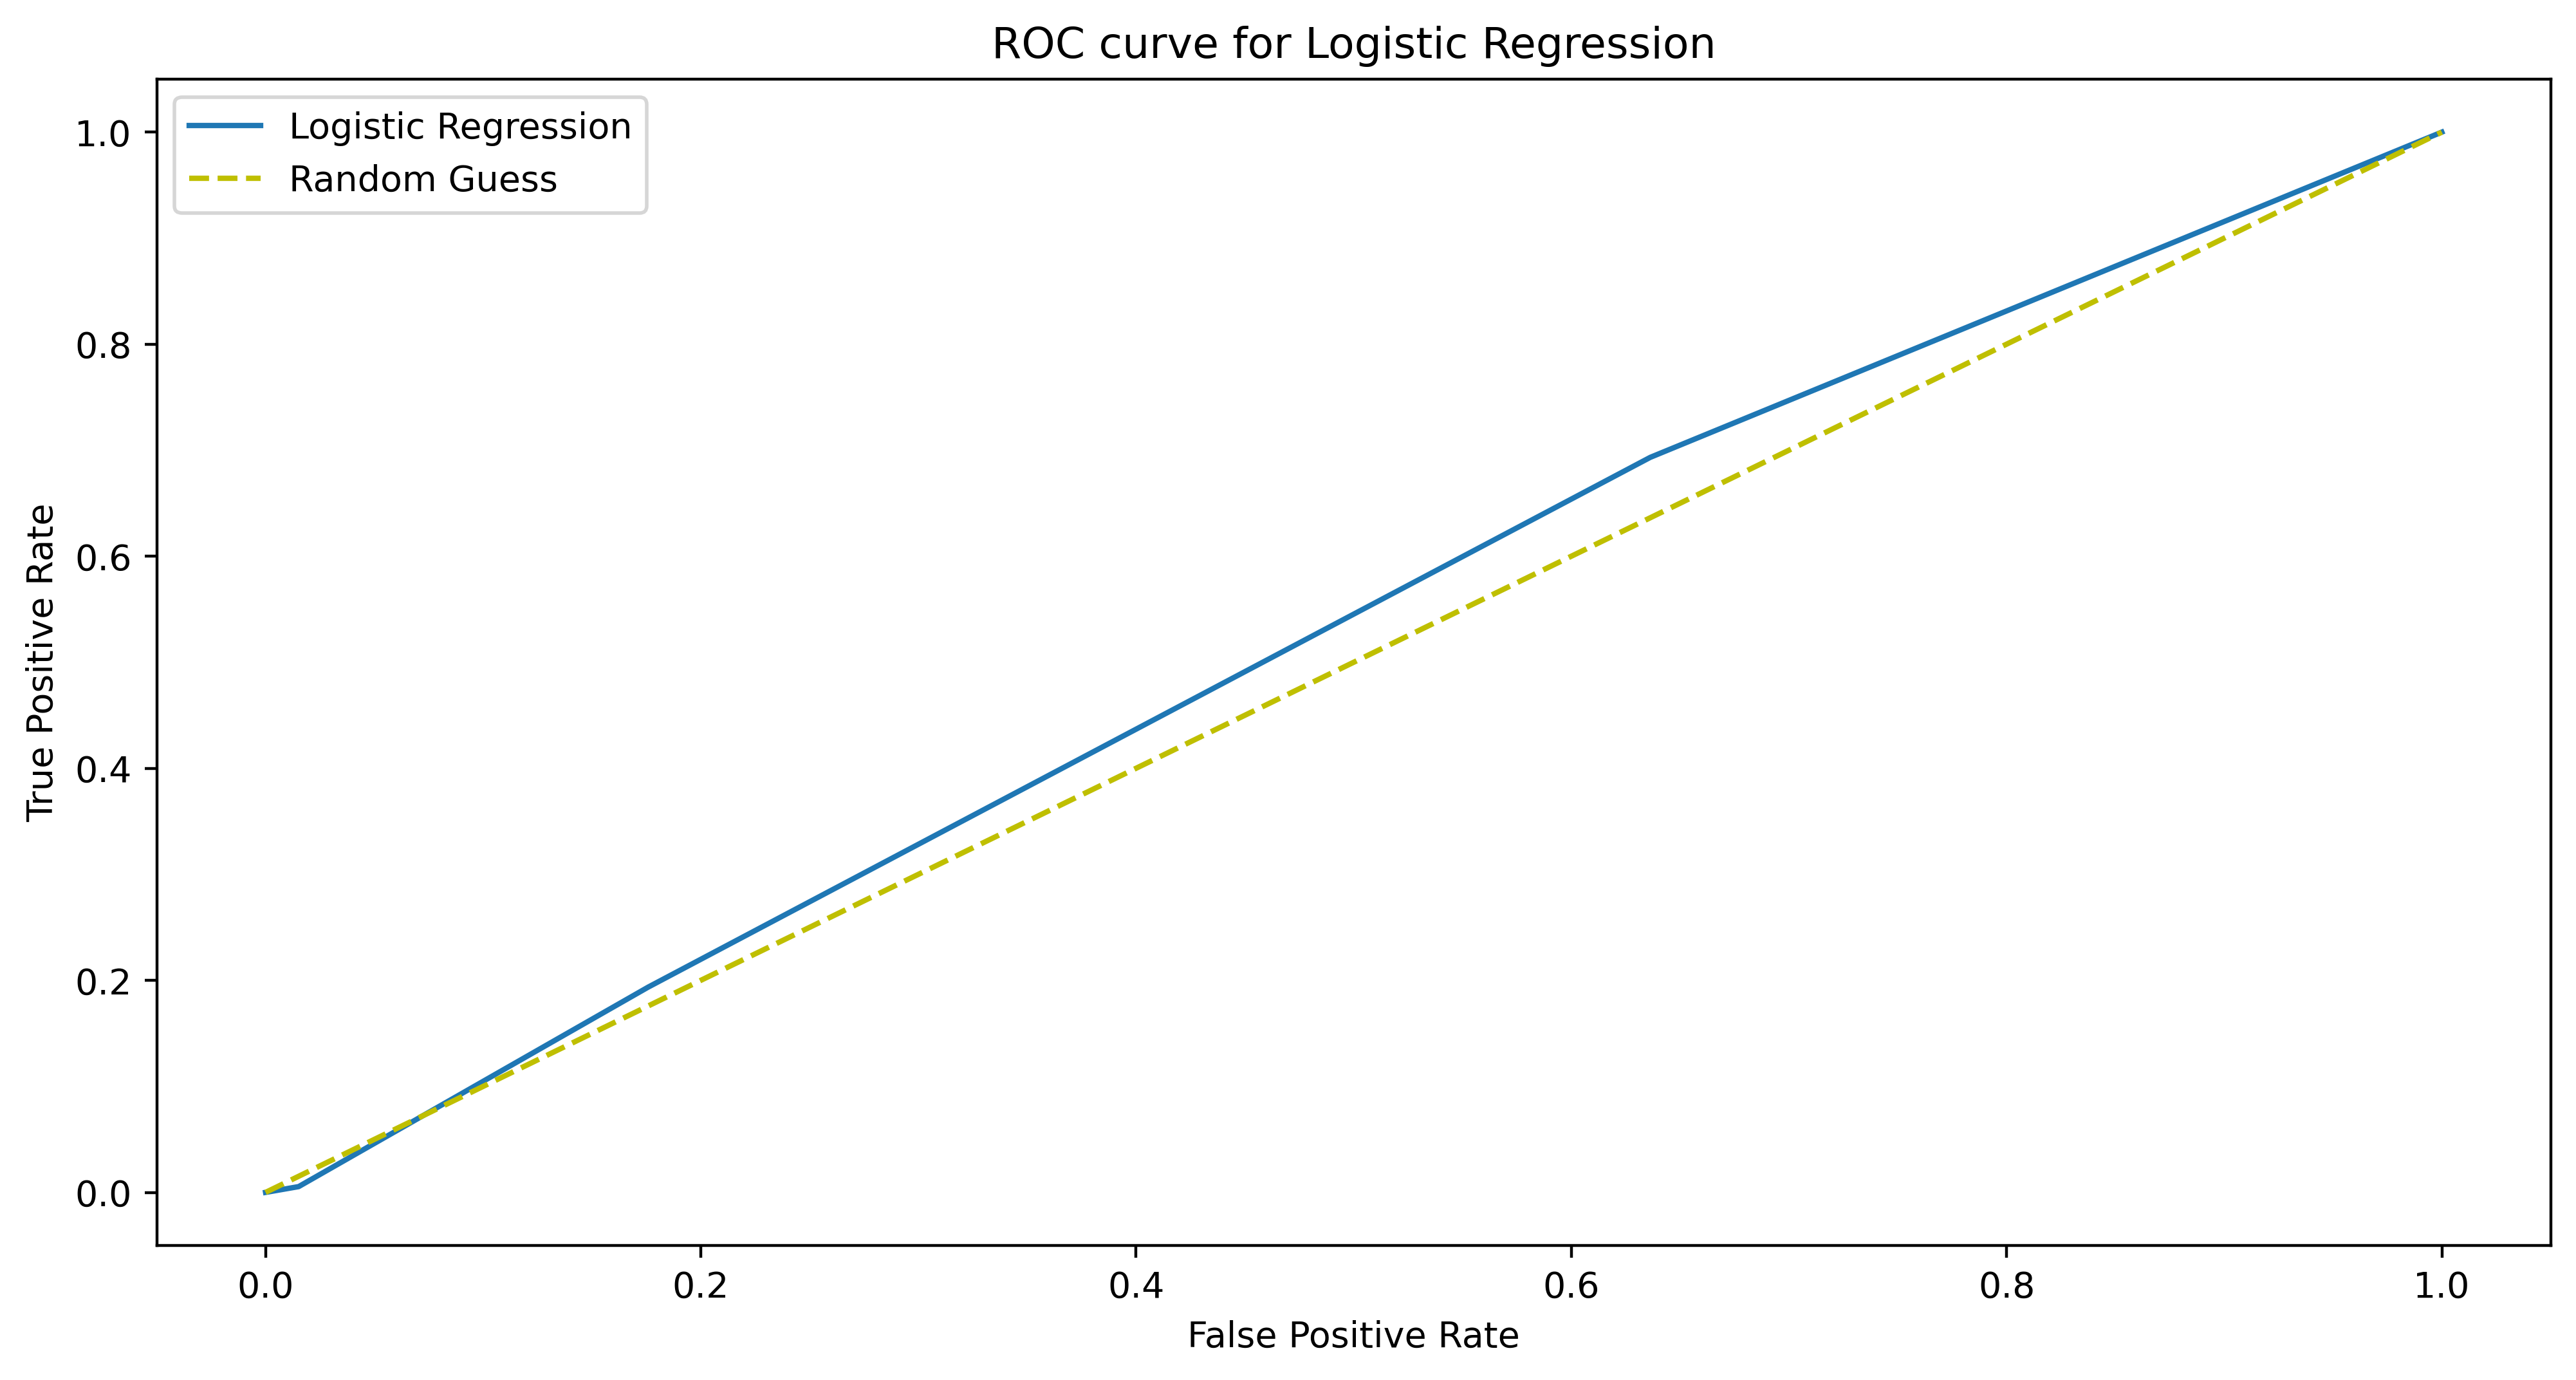

In [188]:
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1])
plt.figure(figsize=(12,6))
plt.plot(fpr,tpr,'-')
plt.plot([0,1],[0,1],'y--')
plt.legend(['Logistic Regression','Random Guess'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.show()

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [189]:
precision,recall,threshold=precision_recall_curve(y_test,predicted_probabilities[:,1])
for prec, rec, th in zip(precision, recall, threshold):
    print(f"The precision is {prec}, the recall value is {rec} and the threshold value is {th}")


The precision is 0.22007200720072007, the recall value is 1.0 and the threshold value is 0.20647910176464915
The precision is 0.23514450867052022, the recall value is 0.6932515337423313 and the threshold value is 0.22505054827425042
The precision is 0.2370617696160267, the recall value is 0.19359236537150648 and the threshold value is 0.24477711346299624
The precision is 0.09195402298850575, the recall value is 0.0054533060668029995 and the threshold value is 0.26564007848747334


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


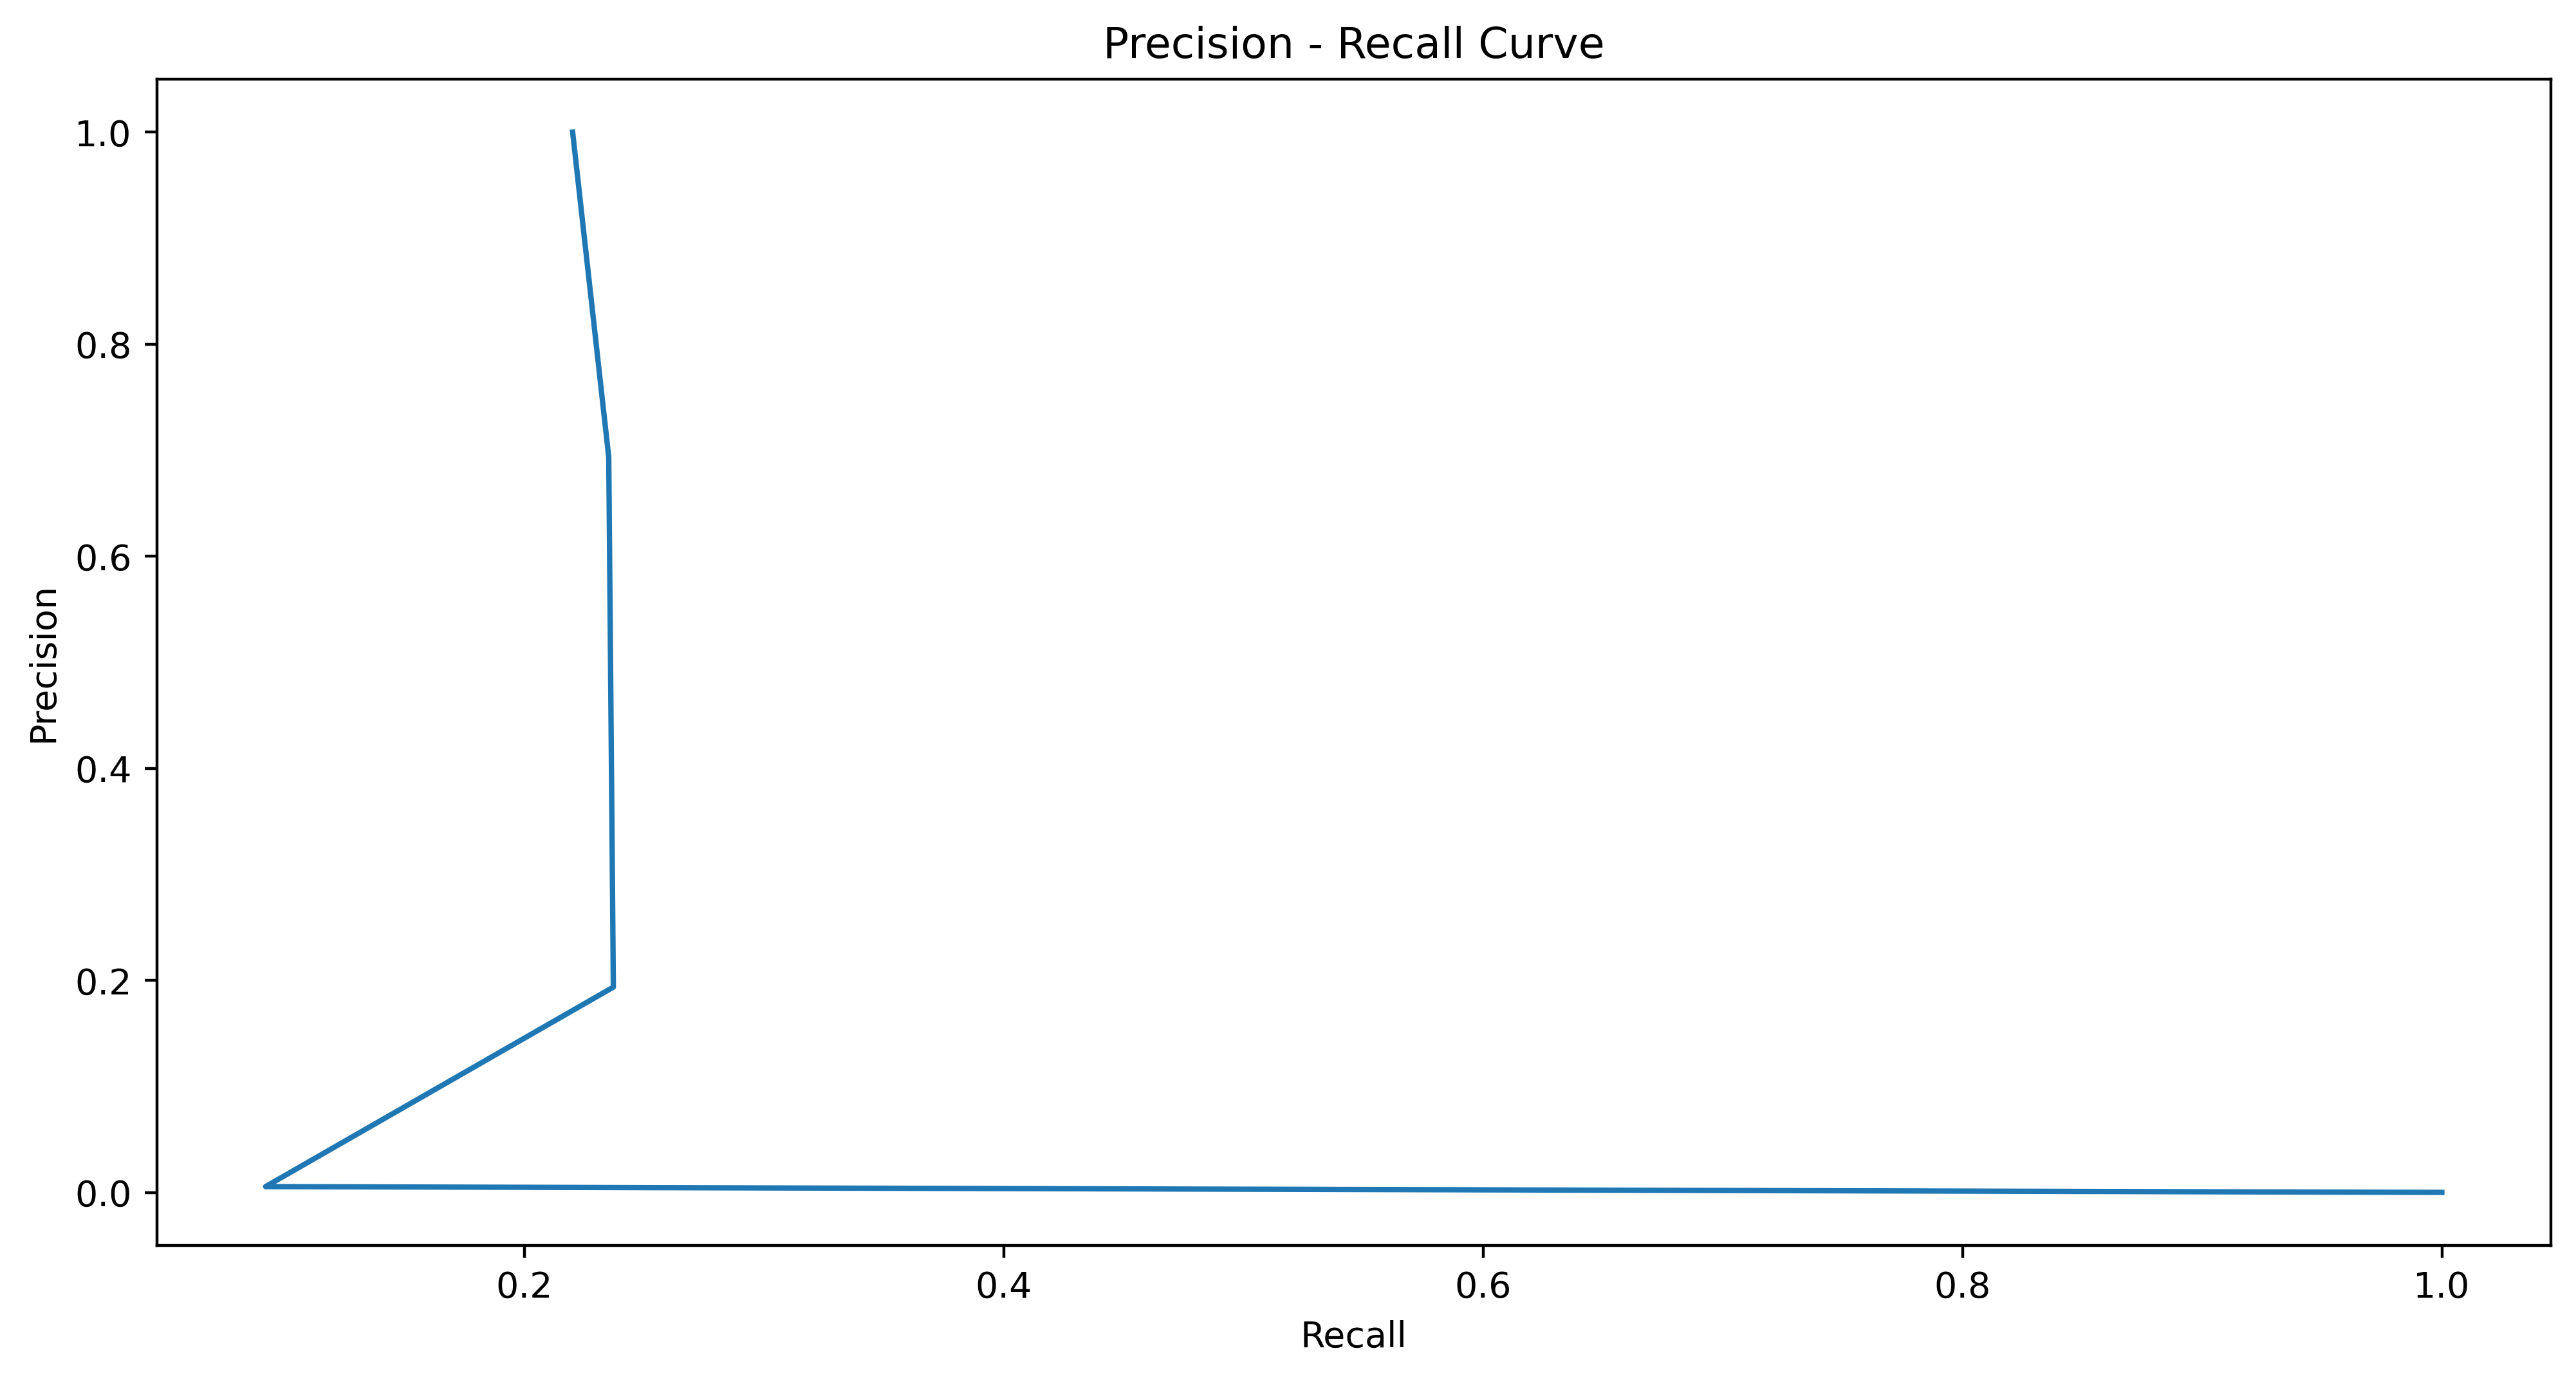

In [190]:
plt.figure(figsize=(12,6))
plt.plot(precision, recall, '-')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision - Recall Curve')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [191]:
auc(recall, precision)

0.22171732279102113

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [192]:
training_data_predictions=model.predict_proba(X_train)
roc_auc_score(y_train,training_data_predictions[:,1])

0.5

    How is this different, conceptually and quantitatively, from your earlier calculation?


### The earlier calculation was conducted on the test data and it fetched a ROC AUC of 0.625 but know we used the train data so we get a ROC AUC of 0.5